In [1]:
import trimesh
import numpy as np
from ICP import ICP
from utils import compare_points, compute_rre, compute_rte

In [2]:
"""Load data."""


source_pcd = trimesh.load("banana/banana.source.ply").vertices
target_pcd = trimesh.load("banana/banana.target.ply").vertices
gt_T = np.loadtxt("banana/banana.pose.txt")

icp = ICP()
T = icp(source_pcd, target_pcd)


[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


rre=179.9971108109324, rte=0.07518517728416582


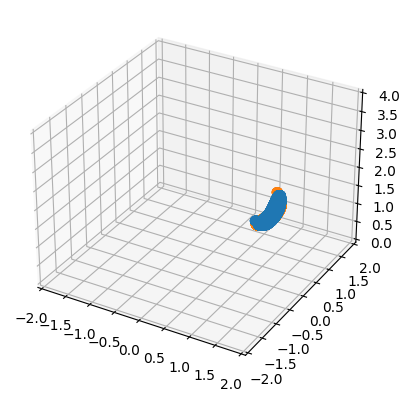

In [3]:
# Visualization
rre = np.rad2deg(compute_rre(T[:3, :3], gt_T[:3, :3]))
rte = compute_rte(T[:3, 3], gt_T[:3, 3])
print(f"rre={rre}, rte={rte}")
compare_points(source_pcd @ T[:3, :3].T + T[:3, 3], target_pcd)
icp.__del__()